In [22]:
import numpy as np
import os
import matplotlib.pyplot as plt

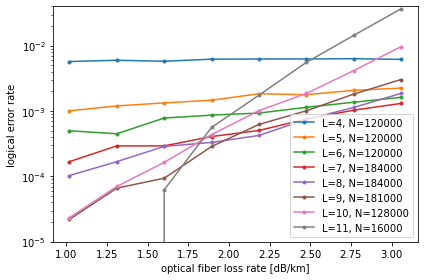

In [56]:
repeat = 200
p1 = 1e-3

L_list = np.arange(4,12)

plt.figure(1)#,figsize=(5,3))
for i_L, L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        # fname = "data_loss_qdot_size/" + "p1_eq_p2_p_%.1f_L_%d_i_%d_new.npz" % (p1*1e3,L,i_rep)
        fname = "data_loss_qdot_size/" + "p1_eq_p2_p_%.1f_L_%d_i_%d_par.npz" % (p1*1e3,L,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            eta_list, fail_prob_z, Nrep_loss = npz_file['eta_list'], npz_file['fail_prob_z'], npz_file['Nrep_loss']
            # print(fail_prob_z)
            if first :
                first = False
                fail_prob_avg = np.zeros(len(eta_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            Ntot += Nrep_loss
            
    for i_rep in range(repeat):
        fname = "data_loss_qdot_size/" + "p1_eq_p2_p_%.1f_L_%d_i_%d_new.npz" % (p1*1e3,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            eta_list, fail_prob_z, Nrep_loss = npz_file['eta_list'], npz_file['fail_prob_z'], npz_file['Nrep_loss']
            # print(fail_prob_z)
            if first :
                first = False
                fail_prob_avg = np.zeros(len(eta_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            Ntot += Nrep_loss
 
    if not first:
        failure_ratio = fail_prob_avg/Ntot   
        
        τ= 10 # nsec
        speed = 2.13e8
        λ_list = 10/np.log(10) * eta_list/(speed*τ*1e-9) * 1e3
        plt.plot(λ_list,failure_ratio,".-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))
        # plt.plot(λ_list,failure_ratio,".-", color="C%d" % (i_L), label="L=%d" % (L))



plt.legend()
plt.ylim([1e-5,4e-2])
# plt.xlim([0.0,1e-3])
# plt.xticks(np.arange(0.08,0.131,0.01))
# plt.xticks(np.arange(0.06,0.1,0.01))
plt.yscale("log")
# plt.grid()
plt.xlabel("optical fiber loss rate [dB/km]")
plt.ylabel("logical error rate")
# plt.legend()
plt.tight_layout()
# plt.savefig("figs/fiber_loss_p1_%.1f.pdf" % (p1*1e3))
plt.show()

In [22]:
L = 10
eta_list = np.linspace(0.3,3,10)*1e-3
p_loss = 1- np.exp(-eta_list* L**2)
print(p_loss)

[0.02955447 0.05823547 0.08606881 0.11307956 0.13929202 0.16472979
 0.18941575 0.21337214 0.23662051 0.25918178]


## analytical curves

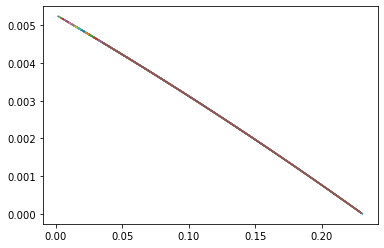

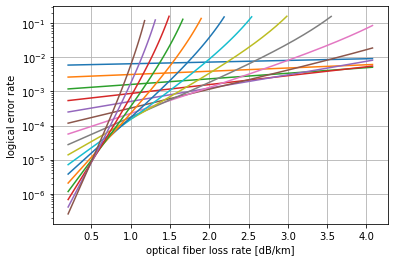

In [50]:
z = [-0.01014677,-0.02050286,0.00526968]
ηlist = np.linspace(0.1,2,200)*1e-3

p1 = 1e-3
L_list = np.arange(4,20)
for L in L_list:
    p_loss = 1-np.exp(-ηlist* L**2)
    p_thres = z[0]* p_loss**2 + z[1]* p_loss + z[2]
    inds = np.argwhere(p_thres>0)[:,0]
    p_thres = p_thres[inds]
    p_loss = p_loss[inds]
    plt.figure(1)
    plt.plot(p_loss,p_thres,label="L=%d" % (L))
    # plt.legend()
    inds2 = np.argwhere(p_thres>p1)[:,0]
    logic_err = 0.16*(p1/p_thres)**(L*(1/2-p_loss))
    plt.figure(2)
    τ= 10 # nsec
    speed = 2.13e8
    λ_list = 10/np.log(10) * ηlist[inds[inds2]]/(speed*τ*1e-9) * 1e3
    plt.plot(λ_list,logic_err[inds2],label="L=%d" % (L))

plt.figure(2)
# plt.legend()
plt.xlabel("optical fiber loss rate [dB/km]")
plt.ylabel("logical error rate")
plt.grid()
plt.yscale("log")
plt.show()


In [ ]:
z = [-0.01014677,-0.02050286,0.00526968]
ηlist = np.linspace(0.3,2,200)*1e-3

p1 = 1e-3
L_list = np.arange(4,13)
for L in L_list:
    p_loss = 1-np.exp(-ηlist* L**2)
    p_thres = z[0]* p_loss**2 + z[1]* p_loss + z[2]
    inds = np.argwhere(p_thres>0)[:,0]
    p_thres = p_thres[inds]
    p_loss = p_loss[inds]
    plt.figure(1)
    plt.plot(p_loss,p_thres,label="L=%d" % (L))
    # plt.legend()
    inds2 = np.argwhere(p_thres>p1)[:,0]
    logic_err = 0.15*(p1/p_thres)**(L/2)
    plt.figure(2)
    plt.plot(ηlist[inds[inds2]],logic_err[inds2],label="L=%d" % (L))
    
plt.figure(2)
# plt.legend()
plt.grid()
plt.yscale("log")
plt.show()

## combining analytical and 

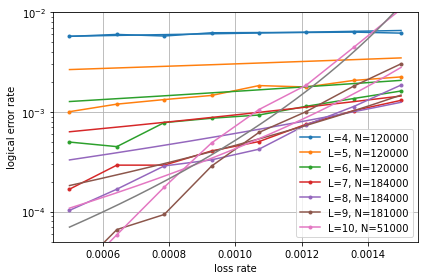

In [52]:
repeat = 200
p1 = 1e-3
L_list = np.arange(4,12)

plt.figure(1)#,figsize=(5,3))
for i_L, L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        # fname = "data_loss_qdot_size/" + "p1_eq_p2_p_%.1f_L_%d_i_%d_new.npz" % (p1*1e3,L,i_rep)
        fname = "data_loss_qdot_size/" + "p1_eq_p2_p_%.1f_L_%d_i_%d_par.npz" % (p1*1e3,L,i_rep)

        if os.path.exists(fname):
            npz_file = np.load(fname)
            eta_list, fail_prob_z, Nrep_loss = npz_file['eta_list'], npz_file['fail_prob_z'], npz_file['Nrep_loss']
            # print(fail_prob_z)
            if first :
                first = False
                fail_prob_avg = np.zeros(len(eta_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            Ntot += Nrep_loss
            
    for i_rep in range(repeat):
        fname = "data_loss_qdot_size/" + "p1_eq_p2_p_%.1f_L_%d_i_%d_new.npz" % (p1*1e3,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            eta_list, fail_prob_z, Nrep_loss = npz_file['eta_list'], npz_file['fail_prob_z'], npz_file['Nrep_loss']
            # print(fail_prob_z)
            if first :
                first = False
                fail_prob_avg = np.zeros(len(eta_list))
                Ntot = 0
            fail_prob_avg += fail_prob_z
            Ntot += Nrep_loss
    if not first:
        failure_ratio = fail_prob_avg/Ntot   
        plt.plot(eta_list,failure_ratio,".-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))

        
    z = [-0.01014677,-0.02050286,0.00526968]
    ηlist = np.linspace(min(eta_list),max(eta_list),200)
    p1 = 1e-3
    p_loss = 1-np.exp(-ηlist* L**2)
    p_thres = z[0]* p_loss**2 + z[1]* p_loss + z[2]
    inds = np.argwhere(p_thres>0)[:,0]
    p_thres = p_thres[inds]
    p_loss = p_loss[inds]
    inds2 = np.argwhere(p_thres>p1)[:,0]
    # logic_err = 0.14*(p1/p_thres)**(int((L+1)/2))
    logic_err = 0.15*(p1/p_thres)**(L/2)
    # logic_err = 0.15*(p1/p_thres)**(int((L+1)/2)*(1-2*p_loss))
    plt.plot(ηlist[inds[inds2]],logic_err[inds2], color="C%d" % (i_L))

plt.legend()
plt.ylim([5e-5,1e-2])
# plt.xlim([0.0,1e-3])
# plt.xticks(np.arange(0.08,0.131,0.01))
# plt.xticks(np.arange(0.06,0.1,0.01))
plt.yscale("log")
plt.grid()
plt.xlabel("loss rate")
plt.ylabel("logical error rate")
# plt.legend()
plt.tight_layout()
# plt.savefig("figs/loss_%.2f_toric_threshold.pdf" % (prob_l))
plt.show()

## with loss

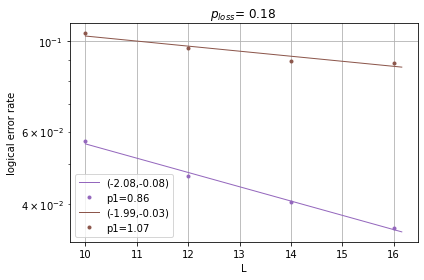

In [ ]:
repeat = 20
L_list = [10,12,14,16]
prob_l = 0.18

failure_ratio_tot = np.zeros((len(L_list),8))
# plt.figure(1)#,figsize=(5,3))
for i_L, L in enumerate(L_list):
    first = True
    for i_rep in range(repeat):
        fname = "data_loss_qdot/" + "p1_eq_p2_p_%.2f_L_%d_i_%d_new2.npz" % (prob_l,L,i_rep)
        if os.path.exists(fname):
            npz_file = np.load(fname)
            p1_list, loss_prob, fail_prob_z, Nrep_loss, Nrep_flip = npz_file['p1_list'], npz_file['loss_prob'], npz_file['fail_prob_z'], npz_file['Nrep_loss'], npz_file['Nrep_flip']
            if first :
                first = False
                fail_prob_avg = np.zeros(len(p1_list))
                loss_prob_avg = 0
                Ntot_loss = 0
                Ntot_flip = 0
                Ntot = 0
            fail_prob_avg += (fail_prob_z+loss_prob)
            loss_prob_avg += loss_prob
            Ntot += Nrep_loss#*(Nrep_loss-loss_prob)+loss_prob
    if not first:
        failure_ratio_tot[i_L,:]=(fail_prob_avg/Ntot)
        # plt.plot(p1_list,failure_ratio_tot[i_L,:],".-", color="C%d" % (i_L), label="L=%d, N=%d" % (L,Ntot))

plt.figure(1)
for i_p, p1 in enumerate(p1_list):
    # if p1<0.00125:
    if i_p in [4,5]:
    # if i_p in [2,3]:
        z = np.polyfit(L_list, np.log(failure_ratio_tot[:,i_p]), 1)
        x_plot = np.linspace(min(L_list),1.01*max(L_list))
        y_plot = np.exp(z[1]+ z[0]*x_plot)
        plt.plot(x_plot,y_plot, color="C%d" % (i_p),linewidth=1, label="(%.2f,%.2f)" % (z[1],z[0]))
        plt.plot(L_list,failure_ratio_tot[:,i_p],".", color="C%d" % (i_p), label="p1=%.2f" % (p1*1e3))


plt.legend()
plt.title(r"$p_{loss} $= %.2f " % (prob_l))
plt.grid()
plt.yscale("log")
plt.xlabel("L")
plt.ylabel("logical error rate")
# plt.legend()
plt.tight_layout()
# plt.savefig("figs/loss_%.2f_toric_threshold.pdf" % (prob_l))
plt.show()

In [164]:
# η = -(0.1/(-np.log(1e-3)-2))**2 * np.log(1-0.19)
η = 1e-3
# print(η)
τ= 10 # nsec
speed = 2.13e8
λ = 10/np.log(10) * η/(speed*τ*1e-9) * 1e3
print(λ)

2.038941229592731


In [43]:
loss_rate_fiber = 0.2 ## dB/km
dist = 2 # km
(1-np.exp(-np.log(10)*loss_rate_fiber/10*dist))*100

8.798916064409024